In [ ]:
#utils file

import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

def sig(z):

    return 1/(1+np.exp(-z))

def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)


def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0

    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)


def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code

    plot_data(X[:, 0:2], y)

    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)

        plt.plot(plot_x, plot_y, c="b")

    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)

        # important to transpose z before calling contour
        z = z.T

        # Plot z = 0.5
        plt.contour(u,v,z, levels = [0.5], colors="g")



# **MODEL WITHOUT REGULARIZATION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math
import copy

In [ ]:
import numpy as np

data = np.loadtxt("/content/ex2data1.txt", delimiter=',', skiprows=1)

# Split the data into X (features) and y (labels)
X_train = data[:, :-1]  # All rows, all columns except the last
y_train = data[:, -1]   # All rows, only the last column

print("X_train:\n", X_train)
print("y_train:\n", y_train)


X_train:
 [[30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 [64.17698887 80.9

In [ ]:
print(X_train.shape,"\n",y_train.shape,"\n",len(X_train),"\n",y_train)

(99, 2) 
 (99,) 
 99 
 [0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1.]


<function matplotlib.pyplot.show(close=None, block=None)>

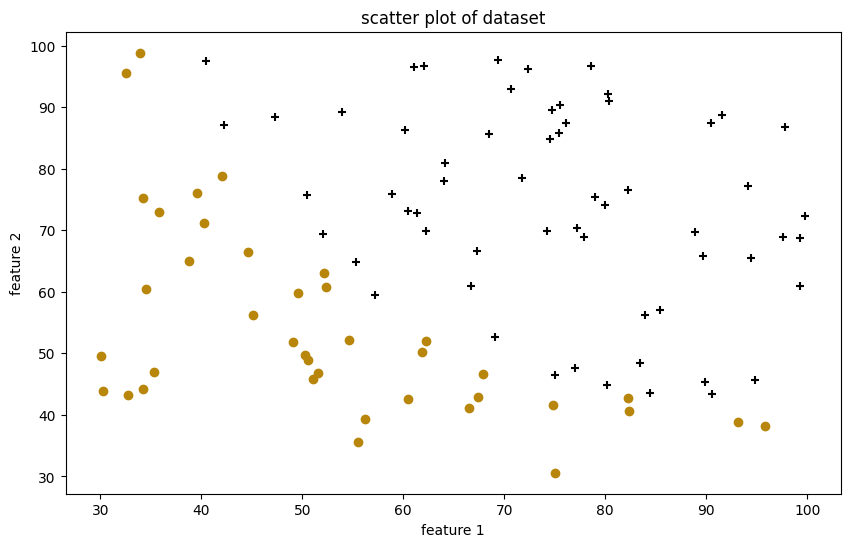

In [ ]:
plt.figure(figsize=(10,6))
class_0=X_train[y_train==0]
class_1=X_train[y_train==1]
plt.scatter(class_0[: ,0],class_0[: ,1],color='#B8860B',label='class 0')
plt.scatter(class_1[: ,0],class_1[: ,1], marker='+',color='black',label='class 1')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('scatter plot of dataset')
plt.legend
plt.show

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
def compute_cost(x,y,w,b):

  m,n=x.shape
  cost=0
  for i in range(0,m):
    z=0
    for j in range(0,n):
      z+=w[j]*x[i,j]
    z+=b
    f=sigmoid(z)
    loss = -y[i] * np.log(f) - (1 - y[i]) * np.log(1 - f)
    cost+=loss

  cost= cost/m

  return cost


In [ ]:
def gradient(x,y,w,b):

  m,n= x.shape
  dw=np.zeros(w.shape)
  db=0
  for i in range (m):
    z=0
    for j in range (n):
      z+=w[j]*x[i,j]
    z+=b
    f=sigmoid(z)

    err=f-y[i]
    db+=err

    for j in range (n):
      dw[j]+=err*x[i,j]

  dw=dw/m
  db=db/m

  return db,dw


In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant

    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient(X, y, w_in, b_in)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  compute_cost(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [ ]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                   compute_cost, gradient, alpha, iterations, 0)

Iteration    0: Cost     0.94   
Iteration 1000: Cost     0.30   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


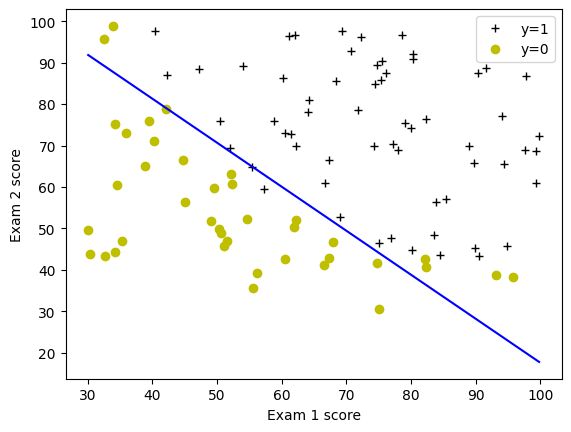

In [ ]:
plot_decision_boundary(w, b, X_train, y_train)
# Set the y-axis label
plt.ylabel('Exam 2 score')
# Set the x-axis label
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right")
plt.show()

# **REGULARIZATION**

In [ ]:
# load dataset
X_train, y_train = load_data("/content/ex2data2.txt")

In [ ]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [ ]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


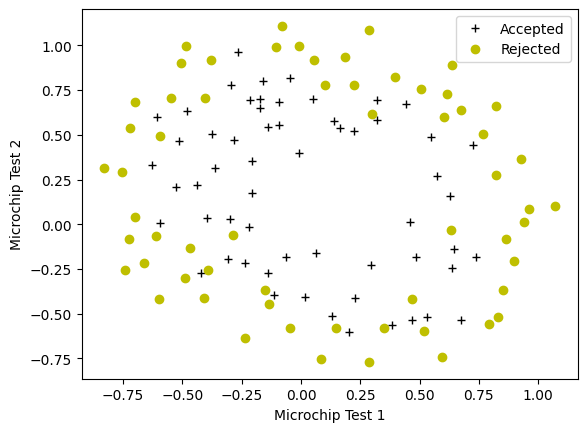

In [ ]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2')
# Set the x-axis label
plt.xlabel('Microchip Test 1')
plt.legend(loc="upper right")
plt.show()

<a name="3.3"></a>
### 3.3 Feature mapping

One way to fit the data better is to create more features from each data point. In the provided function `map_feature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$\mathrm{map\_feature}(x) =
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 27-dimensional vector.

- A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot.
- We have provided the `map_feature` function for you in utils.py.

In [ ]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [ ]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [ ]:
def compute_cost_reg(x,y,w,b,lambda_=1):
  cost=compute_cost(x,y,w,b)

  m,n=x.shape

  reg_cost=0

  for j in range(n):
    reg_cost+=w[j]**2

  reg_cost*=(lambda_/(2*m))

  total_cost= cost+reg_cost

  return total_cost


In [ ]:
def compute_gradient_reg(x, y, w, b, lambda_ = 1):

  db,dw=gradient(x,y,w,b)

  m,n=x.shape

  for j in range(n):
    dw[j]=dw[j]+ (lambda_/m)*w[j]

  return db,dw

In [ ]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.44   


<ipython-input-137-885ae5cdf047>:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)


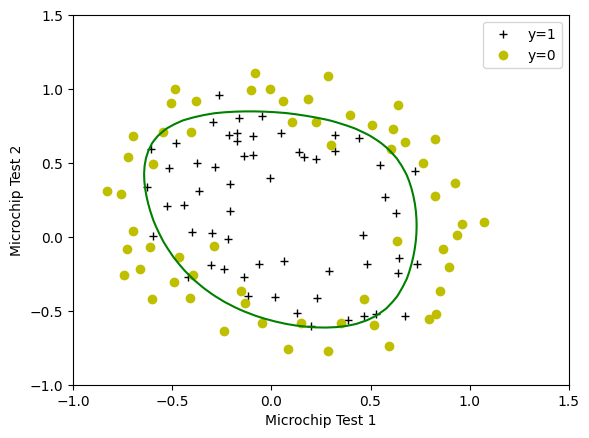

In [ ]:
plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Microchip Test 2')
# Set the x-axis label
plt.xlabel('Microchip Test 1')
plt.legend(loc="upper right")
plt.show()

In [ ]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_mapped ,y_train, initial_w, initial_b,
                                   compute_cost, gradient, alpha, iterations, 0)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.67   
Iteration 2000: Cost     0.64   
Iteration 3000: Cost     0.63   
Iteration 4000: Cost     0.62   
Iteration 5000: Cost     0.61   
Iteration 6000: Cost     0.60   
Iteration 7000: Cost     0.60   
Iteration 8000: Cost     0.59   
Iteration 9000: Cost     0.59   
Iteration 9999: Cost     0.59   


# **without** **regularization**

<ipython-input-137-885ae5cdf047>:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)


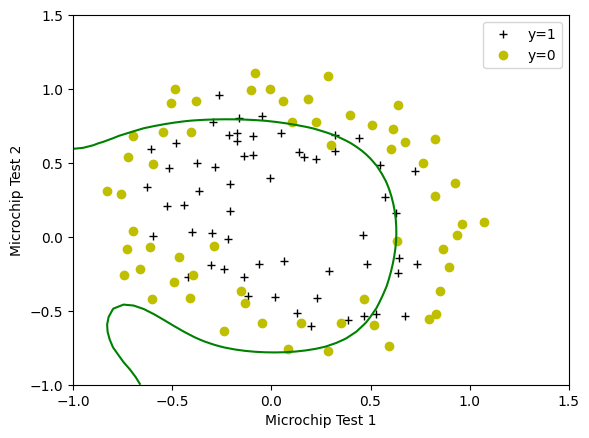

In [ ]:
plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Microchip Test 2')
# Set the x-axis label
plt.xlabel('Microchip Test 1')
plt.legend(loc="upper right")
plt.show()